In [138]:
import pandas as pd
from numpy import log
import matplotlib.pyplot as plt
import numpy as np

In [139]:
root_path = 'all_results'
runtime_results_path = ['1_runExperiment1.dat', '2_runExperiment1.dat', '3_runExperiment1.dat']
accuracy_result_path = ['1_runExperiment1.dat.acu', '2_runExperiment1.dat.acu', '3_runExperiment1.dat.acu']

runtime_result = pd.DataFrame(columns=["baseline","dataset","time_left","per_run_time_limit","time"])
accuracy_rresult = pd.DataFrame(columns=["baseline","dataset","accuracy","time_left","per_run_time_limit","max_models"])

keys_result = [] 
keys_accuracy = []
df_result = []
df_accuracy = []
for result in runtime_results_path:
    df = pd.read_csv(f'{root_path}/{result}')
    df_result.append(df)

for acc in accuracy_result_path:
    df = pd.read_csv(f'{root_path}/{acc}')
    df_accuracy.append(df)

runtime_result = pd.concat(df_result)
accuracy_rresult = pd.concat(df_accuracy)


for i in range(0, len(runtime_result)):
    row = runtime_result.iloc[i]
    keys_result.append(f'{row["baseline"]}-{row["dataset"]}-{row["time_left"]}-{row["per_run_time_limit"]}')

    row = accuracy_rresult.iloc[i]
    keys_accuracy.append(f'{row["baseline"]}-{row["dataset"]}-{row["time_left"]}-{row["per_run_time_limit"]}')

    

runtime_result['key'] = np.array(keys_result)
accuracy_rresult['key'] = np.array(keys_accuracy)

result = pd.merge(runtime_result, accuracy_rresult, on='key',  how='left')
print(result.columns)

Index(['baseline_x', 'dataset_x', 'time_left_x', 'per_run_time_limit_x',
       'time', 'key', 'baseline_y', 'dataset_y', 'accuracy', 'time_left_y',
       'per_run_time_limit_y', 'max_models'],
      dtype='object')


In [151]:
def get_plot_df(data, dataset):
    columns = ['time_left']
    baselines = data['baseline_x'].unique()

    for c in baselines:
        columns.append(c)
    df_plot = pd.DataFrame(columns=columns)
    df = data[(result['dataset_x'] ==dataset) & (result['per_run_time_limit_x'] ==30)]
    
    time_left = [120,180,240,300]
    df_plot['time_left'] = time_left
    df_plot.set_index('time_left', inplace = True)
    
    for i in time_left:
         for b in baselines:
            #  print(f'{i} -- {b}')
            row = df.loc[(df['time_left_x']==i) & (df['baseline_x']==b)]
            row.reset_index(drop=True, inplace=True)            
            df_plot.at[i,b] = round(row.at[0,'accuracy']*100)

    df_plot['time_left'] = df_plot.index
    # df_plot = df_plot.reset_index()
    return df_plot

In [152]:
def plotting(dataset):
    df = get_plot_df(result, dataset)
    plt.figure()
    ax = df.plot(x="time_left",
            kind='bar',
            stacked=False,
            log = False,
            rot = 0,
            title=f'Experimental Results ({dataset})')
    plt.ylabel('Accuracy [%]')

<Figure size 640x480 with 0 Axes>

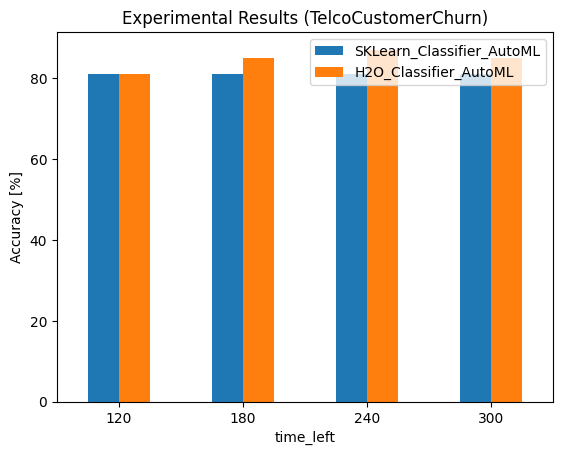

<Figure size 640x480 with 0 Axes>

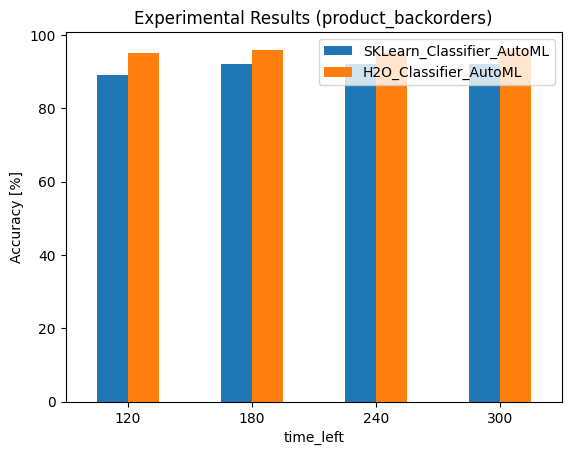

<Figure size 640x480 with 0 Axes>

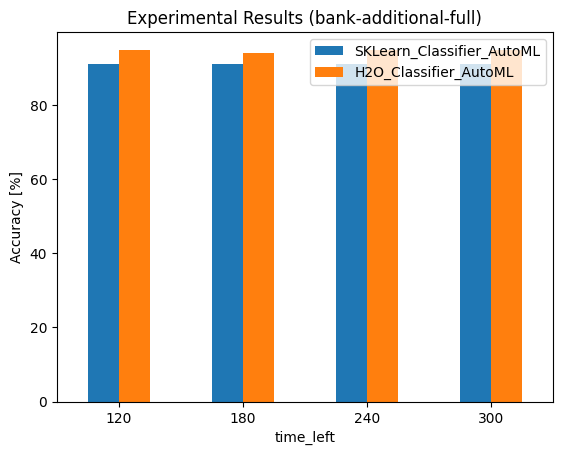

In [153]:
plotting('TelcoCustomerChurn')
plotting('product_backorders')
plotting('bank-additional-full')

            Dataset  ChatGPT  Auto-sklearn  H2O-AutoML
0           Titanic      0.3           120          28
1  Health Insurance      0.7           130          30


<Figure size 640x480 with 0 Axes>

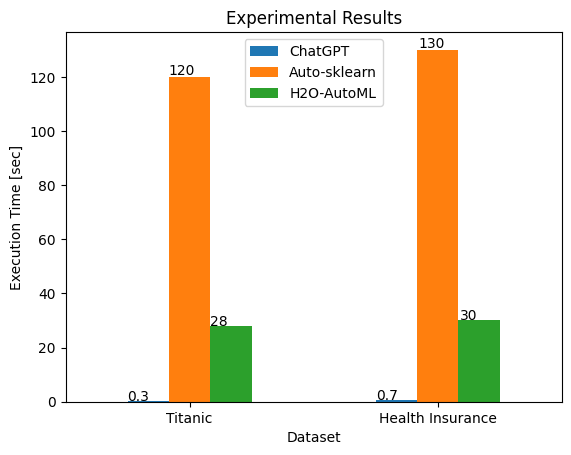

In [9]:
from numpy import log

df = pd.DataFrame([['Titanic', .3, 120, 28],
                   ['Health Insurance', .7,130, 30 ]],
                  columns=['Dataset', 'ChatGPT', 'Auto-sklearn', 'H2O-AutoML'])
print(df)

plt.figure()
ax = df.plot(x='Dataset',
        kind='bar',
        stacked=False,
        log = False,
        rot = 0,
        title='Experimental Results')
plt.ylabel('Execution Time [sec]')

for p in ax.patches:
    ax.annotate(str(p.get_height()), (p.get_x() * 1.005, p.get_height() * 1.005))

Titanic Dataset

Text(0, 0.5, 'Accuracy')

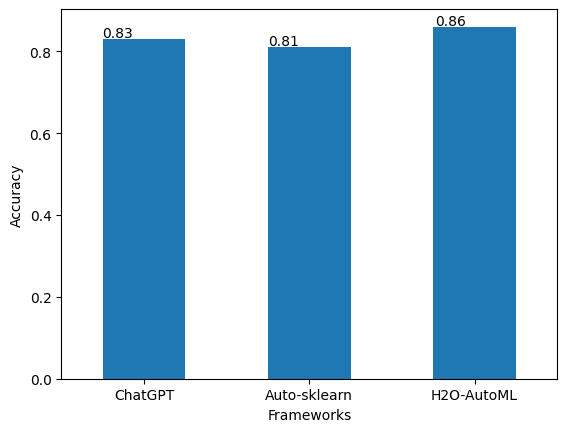

In [10]:
df_accuracy = pd.DataFrame({'Frameworks':['ChatGPT', 'Auto-sklearn', 'H2O-AutoML'], 'Accuracy':[.83, .81, .86]})
ax = df_accuracy.plot.bar(x='Frameworks', y='Accuracy', rot=0, legend=False)

for p in ax.patches:
    ax.annotate(str(p.get_height()), (p.get_x() * 1.005, p.get_height() * 1.005))

plt.ylabel('Accuracy')

Heal Insurance Dataset

Text(0, 0.5, 'MSE')

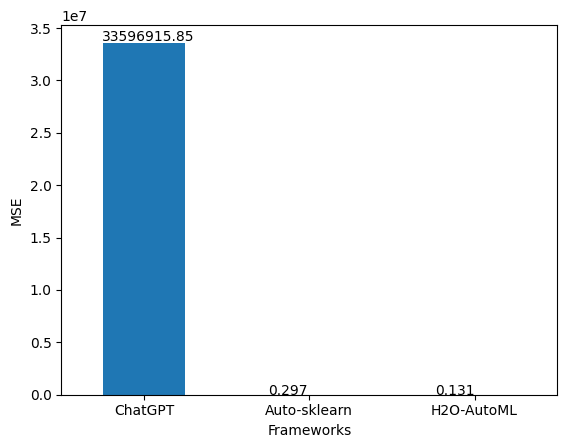

In [11]:
df_accuracy = pd.DataFrame({'Frameworks':['ChatGPT', 'Auto-sklearn', 'H2O-AutoML'], 'MSE':[33596915.85, 0.297, 0.131]})
ax = df_accuracy.plot.bar(x='Frameworks', y='MSE', rot=0, legend=False)

for p in ax.patches:
    ax.annotate(str(p.get_height()), (p.get_x() * 1.005, p.get_height() * 1.005))

plt.ylabel('MSE')